# Derive a carene table from a buoyancy shape


In [9]:
from DAVE import *
from DAVE.jupyter import *

In [10]:
s = Scene("cheetah.dave")  # use the Cheetah model

Loading c:\python\miniconda3\envs\book\lib\site-packages\DAVE\resources\cheetah.dave


Have a look at the names of the nodes

No actors created for node Ballast_system
number of points changed, creating new


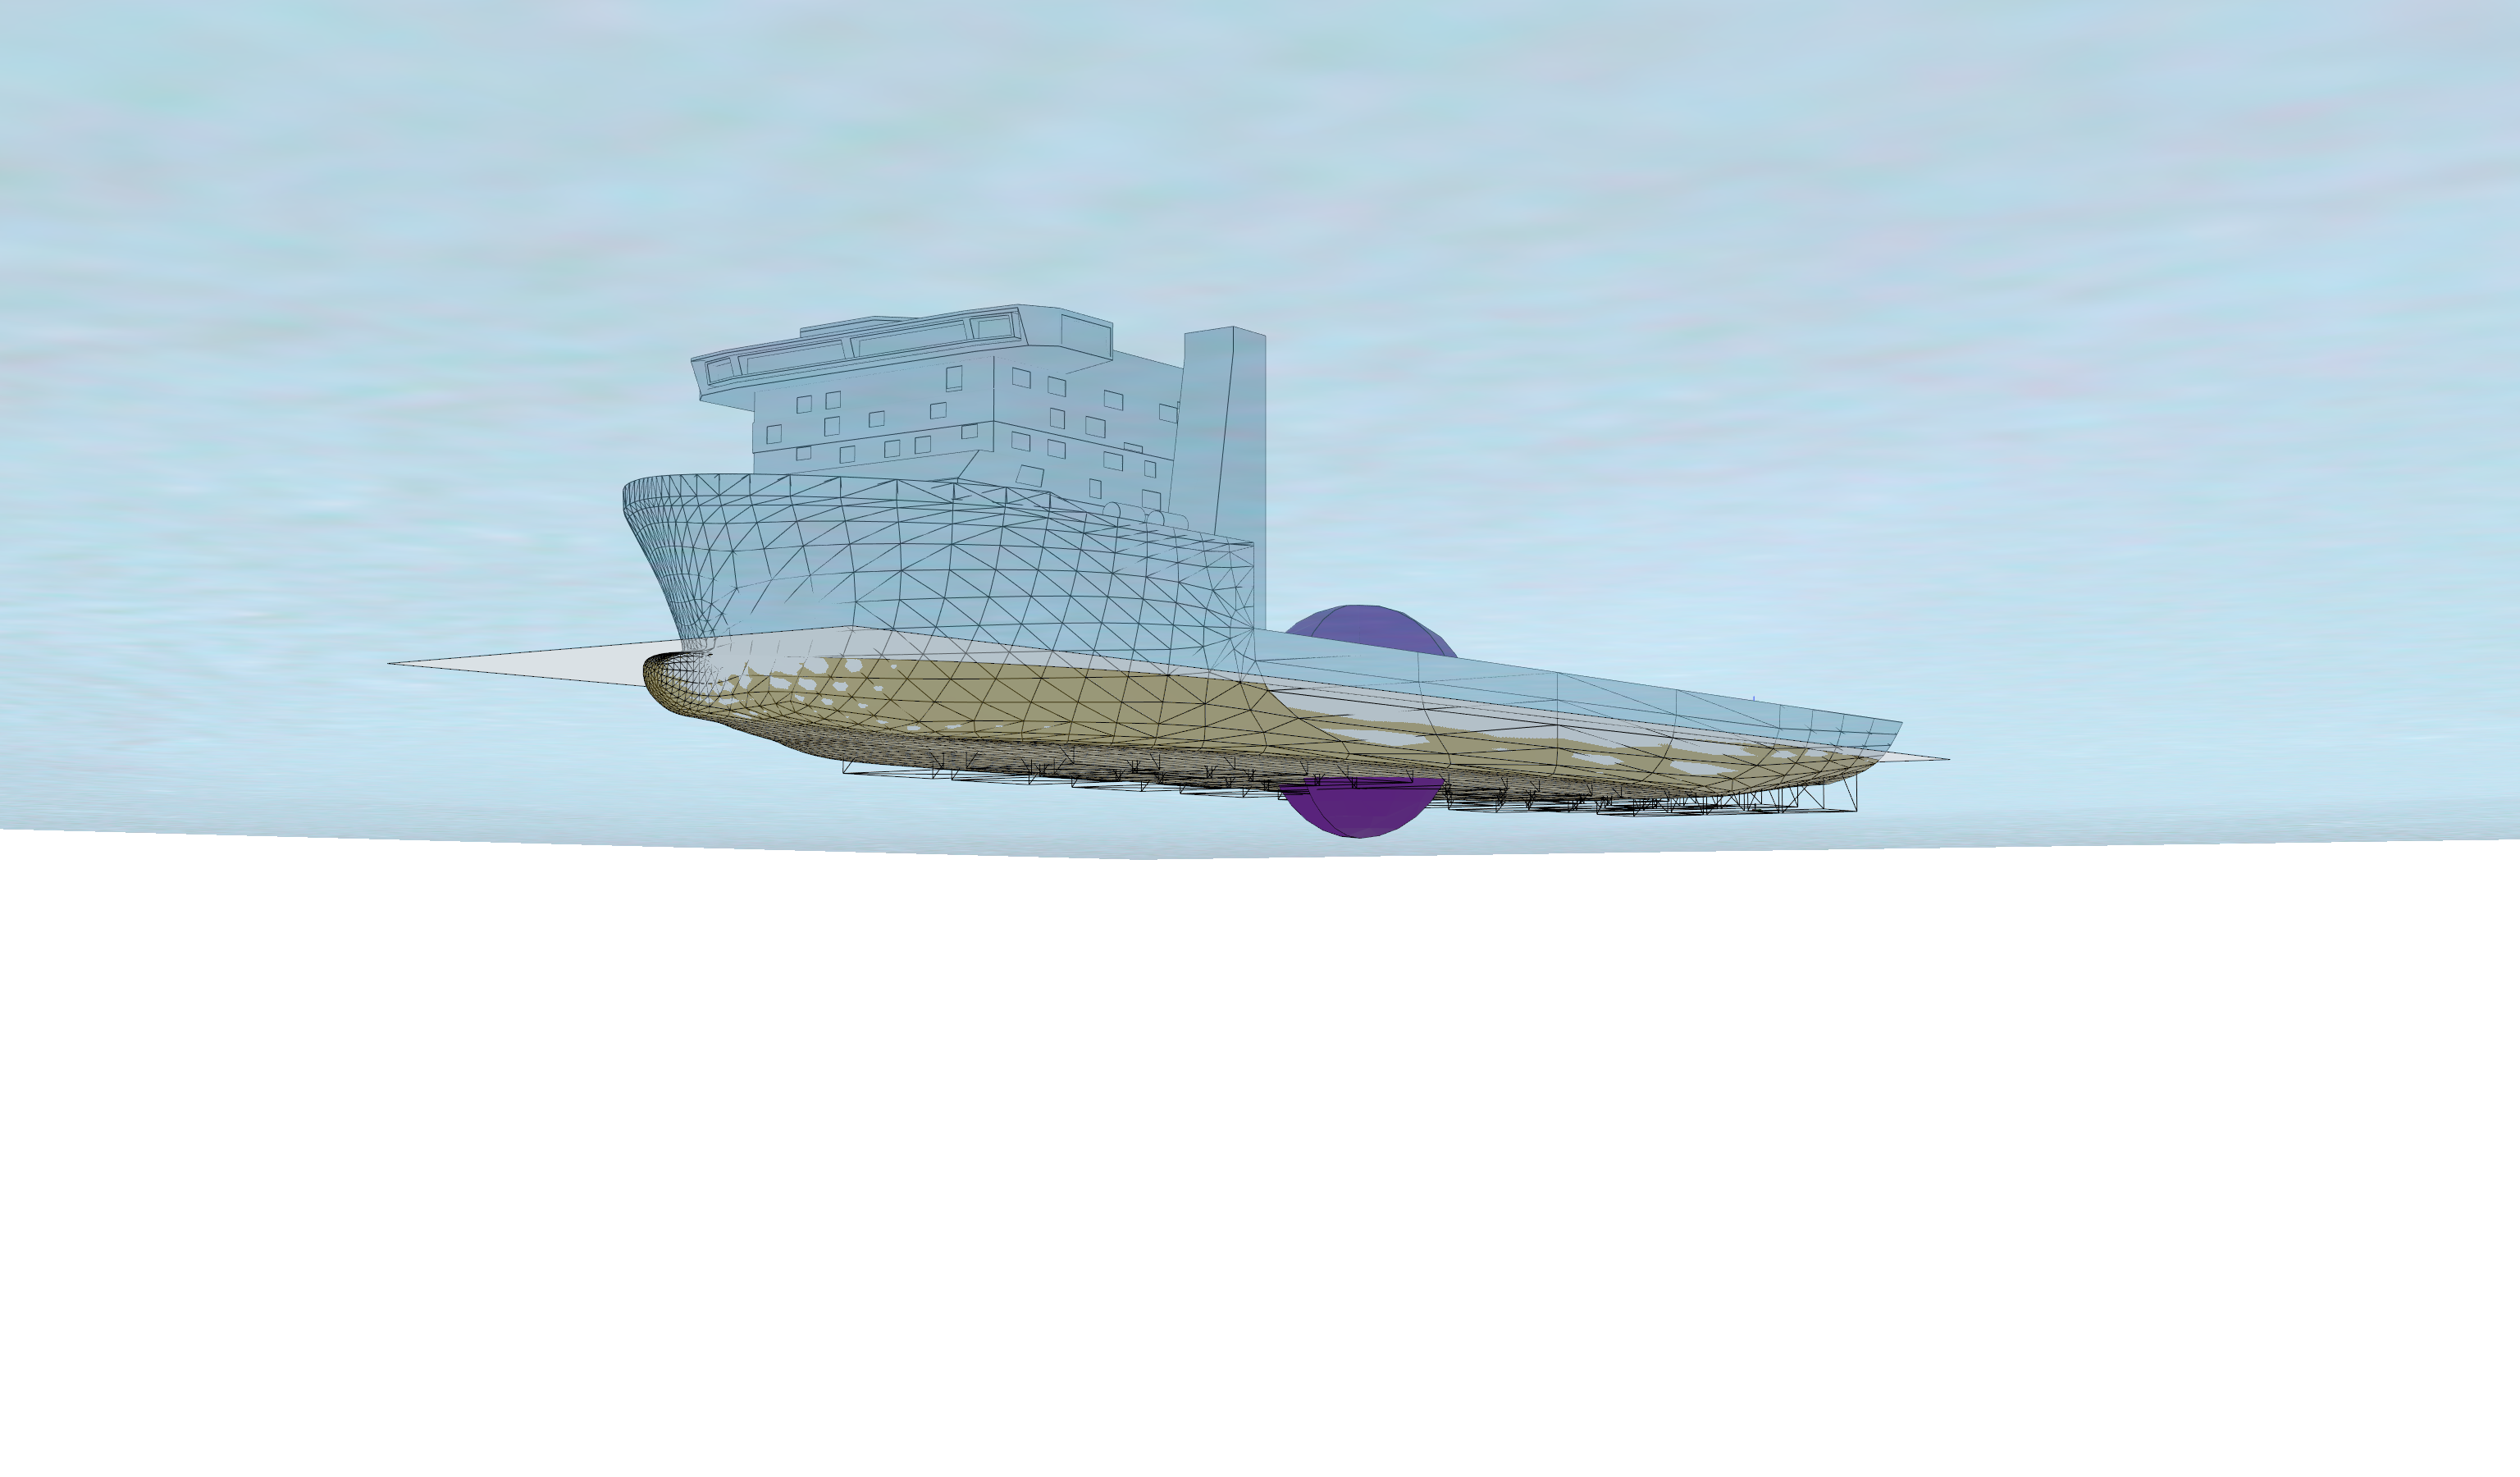

In [11]:
show(s, show_global = True, camera_pos = (377.41378393620676, 177.29136875029081, -22.319832341170876), lookat = (52.20246063341496, -52.124244707385635, 2.968568242388601))

In [12]:
s.print_node_tree()

Cheetah [RigidBody]
 |-> DP reference point [Frame]
 |-> buoyancy [Buoyancy]
 |-> ps1 [Tank]
 |-> sb1 [Tank]
 |-> mid1 [Tank]
 |-> ps2 [Tank]
 |-> sb2 [Tank]
 |-> mid2 [Tank]
 |-> ps3 [Tank]
 |-> sb3 [Tank]
 |-> mid3 [Tank]
 |-> ps4 [Tank]
 |-> sb4 [Tank]
 |-> mid4 [Tank]
 |-> ps5 [Tank]
 |-> sb5 [Tank]
 |-> mid5 [Tank]
 |-> ps6 [Tank]
 |-> sb6 [Tank]
 |-> mid6 [Tank]
 |-> ps7 [Tank]
 |-> sb7 [Tank]
 |-> mid7 [Tank]
 |-> ps8 [Tank]
 |-> sb8 [Tank]
 |-> mid8 [Tank]
 |-> ps9 [Tank]
 |-> sb9 [Tank]
 |-> bow [Tank]
 |-> visual - vessel [Visual]
 |-> Wave Interaction draft 6.75 [WaveInteraction1]
 |-> Ballast_system [BallastSystem]
DP setpoint for cheetah [Frame]
DP springs cheetah [LC6d]


In [13]:
from DAVE.marine import carene_table

## Calculate the carene table

- The carene curve is requested based on the buoyancy node [Buoyancy], not the vessel node !
- The table is calculated numerically using a small displacement from the even-keel situation.

In [14]:
node = s['buoyancy']
table = carene_table(s, node, draft_min = 0.25, draft_max = 9, stepsize=.5)

In [15]:
table

,BM T [m],BM L [m],CoF x [m],CoF y [m],Awl [m2],Displacement [m3],CoB x [m],CoB y [m],CoB z [m]
Draft [m],,,,,,,,,
0.25,549.000884,5942.565819,112.103608,7.784851e-07,6038.173587,1395.640155,111.616555,7.311428e-07,0.129644
0.75,214.740826,2708.765262,112.158916,7.381401e-07,6654.911794,4592.819177,112.173159,7.549822e-07,0.390179
1.25,130.593750,1821.963021,110.752916,6.860430e-07,7029.141537,8016.753434,111.897894,7.388329e-07,0.651599
1.75,94.702157,1427.590275,108.768755,5.794678e-07,7351.936858,11614.140624,111.246751,7.080090e-07,0.914965
2.25,74.717759,1207.275426,106.610463,3.926401e-07,7630.726360,15360.935796,110.375567,6.549477e-07,1.180002
2.75,62.134729,1063.599542,104.621392,1.580715e-07,7883.494097,19240.185343,109.412334,5.787125e-07,1.446416
3.25,53.585599,963.068462,102.559857,-1.063507e-07,8139.838123,23245.316491,108.411198,4.836934e-07,1.714326
3.75,47.096220,890.022494,100.988847,-3.203614e-07,8347.599024,27373.555404,107.389634,3.765399e-07,1.983785
4.25,41.817434,811.018803,100.184583,-4.420001e-07,8477.435606,31580.872606,106.480040,2.750674e-07,2.252478


## Plotting

First re-generate the table with a smaller set-size:

In [16]:
table = carene_table(s, node, draft_min = 0.25, draft_max = 9, stepsize=.1)

By default the table in indexed by draft. This means the plot methods will plot with draft on the x-axis:

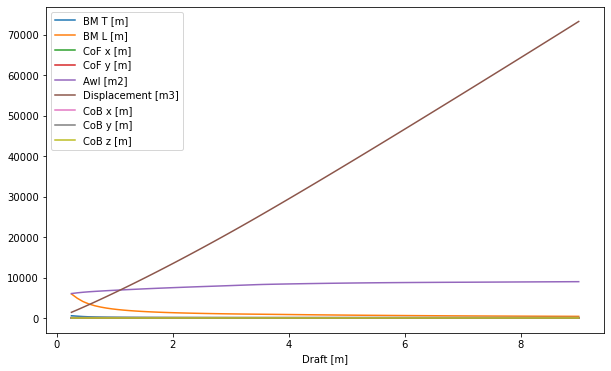

In [17]:
# Set matplotlib figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

table.plot();

To be able to plot with in the traditional way with the draft vertical we need to reset the index.
The x and y can then be specified by name

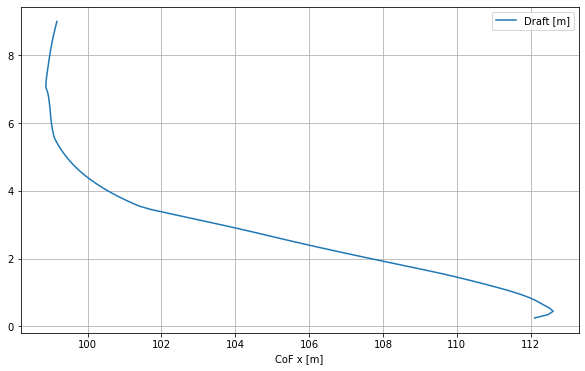

In [18]:
table = table.reset_index()
table.plot(x = 'CoF x [m]', y= 'Draft [m]')
plt.grid()

For plotting multiple lines in the same graph it is easiest to create the plots using matplotlib directly.

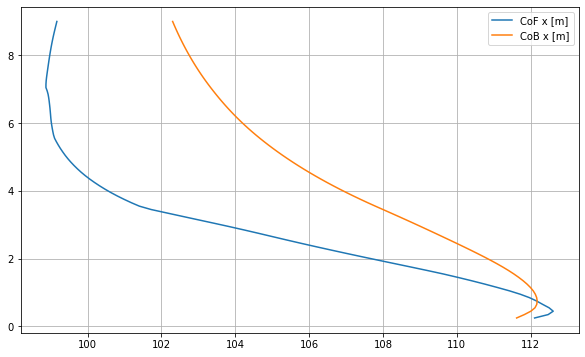

In [19]:
draft = table['Draft [m]']
cofx = table['CoF x [m]']
cobx = table['CoB x [m]']

plt.plot(cofx, draft,label='CoF x [m]')
plt.plot(cobx, draft,label='CoB x [m]')
plt.grid()
plt.legend();

Observe that the CoBx line is vertical at the point where CoBx = CoFx. Does that make sense?

-- done --